In [51]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
assets=['PG','^GSPC']

In [85]:
sec_prices=pd.DataFrame()
for a in assets:
    sec_prices[a]=wb.DataReader(a,data_source='yahoo',start='2010-1-1')['Adj Close']
sec_prices

,PG,^GSPC
Date,,
2010-01-04,43.275536,1132.989990
2010-01-05,43.289703,1136.520020
2010-01-06,43.084377,1137.140015
2010-01-07,42.850716,1141.689941
2010-01-08,42.794079,1144.979980
...,...,...
2021-04-01,134.279999,4019.870117
2021-04-05,136.449997,4077.909912
2021-04-06,136.500000,4073.939941


In [86]:
sec_change_ratio=(sec_prices/sec_prices.iloc[0])*100
sec_change_ratio

,PG,^GSPC
Date,,
2010-01-04,100.000000,100.000000
2010-01-05,100.032739,100.311568
2010-01-06,99.558276,100.366290
2010-01-07,99.018337,100.767875
2010-01-08,98.887462,101.058261
...,...,...
2021-04-01,310.290784,354.801909
2021-04-05,315.305161,359.924620
2021-04-06,315.420706,359.574222


<AxesSubplot:xlabel='Date'>

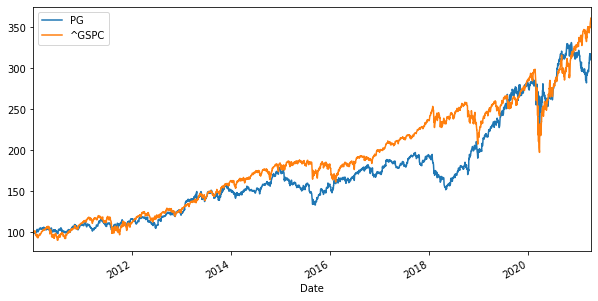

In [87]:
sec_change_ratio.plot(figsize=(10,5))

In [88]:
pf_returns=np.log(sec_prices/sec_prices.shift(1))
pf_returns

,PG,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.003111
2010-01-06,-0.004754,0.000545
2010-01-07,-0.005438,0.003993
2010-01-08,-0.001323,0.002878
...,...,...
2021-04-01,-0.008528,0.011756
2021-04-05,0.016031,0.014335
2021-04-06,0.000366,-0.000974


In [89]:
pf_annual_returns=pf_returns.mean()*250
pf_annual_returns

PG       0.101825
^GSPC    0.113394
dtype: float64

In [90]:
pf_annual_convarance_matrix=pf_returns.cov()*250
pf_annual_convarance_matrix

,PG,^GSPC
PG,0.029190,0.017679
^GSPC,0.017679,0.030439


In [91]:
pf_correlation_matrix=pf_returns.corr()
pf_correlation_matrix

,PG,^GSPC
PG,1.000000,0.593098
^GSPC,0.593098,1.000000


In [92]:
weights=np.random.random(len(assets))
weights /= np.sum(weights)
weights

array([0.95217638, 0.04782362])

In [93]:
weights*pf_annual_returns

PG       0.096955
^GSPC    0.005423
dtype: float64

In [94]:
pf_annual_returns

PG       0.101825
^GSPC    0.113394
dtype: float64

In [95]:
portfolio_expected_returns_a=sum(pf_annual_returns*weights)
portfolio_expected_returns_a

0.10237838209382281

In [96]:
portfolio_expected_variance=np.dot(weights.T,np.dot(pf_returns.cov()*250,weights))
portfolio_expected_variance

0.02814424357664372

In [97]:
portifolio_expected_volatility=np.sqrt(portfolio_expected_variance)
portifolio_expected_volatility

0.16776246176258777

In [98]:
portfolio_returns=[]
portfolio_volatilities=[]
for x in range(1000):
    weights=np.random.random(len(assets))
    weights/=sum(weights)
    portfolio_returns.append(np.sum(weights*pf_returns.mean()*250))
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(pf_returns.cov()*250,weights))))

portfolio_returns,portfolio_volatilities

([0.10777569236336909,
  0.10625638172869173,
  0.11274275039477925,
  0.11309336496194779,
  0.10824102343374667,
  0.10658596912824903,
  0.10689660946334385,
  0.10942442817684836,
  0.10758072755081324,
  0.10823073751352333,
  0.11213622553544166,
  0.1038332503001534,
  0.10932327934765983,
  0.10897756236135606,
  0.11272652927833014,
  0.10280981458997725,
  0.10986354496507107,
  0.10554677299439882,
  0.11048037711022474,
  0.10738994595565325,
  0.10774732963063119,
  0.10730026319923869,
  0.11154620489499299,
  0.10495198731261028,
  0.10580352061399488,
  0.10567197916551685,
  0.10666731686882111,
  0.10632489323395893,
  0.11017027769952084,
  0.10733705320994594,
  0.10227955599313236,
  0.11311980907427978,
  0.11045533070744859,
  0.10188420562067134,
  0.10403742751135442,
  0.1068315220040067,
  0.1084219838641281,
  0.10483856878185673,
  0.11104193532879111,
  0.11105426735946154,
  0.10512441905290396,
  0.11084708960358121,
  0.1089925633095126,
  0.10847723178

In [99]:
portfolio_returns=np.array(portfolio_returns)
portfolio_volatilities=np.array(portfolio_volatilities)
portfolio_returns, portfolio_volatilities

(array([0.10777569, 0.10625638, 0.11274275, 0.11309336, 0.10824102,
        0.10658597, 0.10689661, 0.10942443, 0.10758073, 0.10823074,
        0.11213623, 0.10383325, 0.10932328, 0.10897756, 0.11272653,
        0.10280981, 0.10986354, 0.10554677, 0.11048038, 0.10738995,
        0.10774733, 0.10730026, 0.1115462 , 0.10495199, 0.10580352,
        0.10567198, 0.10666732, 0.10632489, 0.11017028, 0.10733705,
        0.10227956, 0.11311981, 0.11045533, 0.10188421, 0.10403743,
        0.10683152, 0.10842198, 0.10483857, 0.11104194, 0.11105427,
        0.10512442, 0.11084709, 0.10899256, 0.10847723, 0.11319805,
        0.11238911, 0.103401  , 0.10815671, 0.10921898, 0.10699458,
        0.10898992, 0.11040452, 0.107515  , 0.10788294, 0.10946721,
        0.10772054, 0.10846174, 0.11277945, 0.10221521, 0.11037603,
        0.1058831 , 0.11106609, 0.10689849, 0.11006265, 0.1085876 ,
        0.10895739, 0.11134939, 0.10655962, 0.10641593, 0.11020651,
        0.11036488, 0.10843729, 0.11056938, 0.10

In [100]:
portfolios=pd.DataFrame({'Returns':portfolio_returns,'Volatility':portfolio_volatilities})

In [101]:
portfolios.head()

,Returns,Volatility
0,0.107776,0.154174
1,0.106256,0.154702
2,0.112743,0.170526
3,0.113093,0.172603
4,0.108241,0.154555


In [102]:
portfolios.tail()

,Returns,Volatility
995,0.108952,0.155622
996,0.106998,0.154105
997,0.102690,0.166143
998,0.108131,0.154441
999,0.107787,0.154180


In [103]:
portfolios

,Returns,Volatility
0,0.107776,0.154174
1,0.106256,0.154702
2,0.112743,0.170526
3,0.113093,0.172603
4,0.108241,0.154555
...,...,...
995,0.108952,0.155622
996,0.106998,0.154105
997,0.102690,0.166143
998,0.108131,0.154441


TypeError: 'str' object is not callable

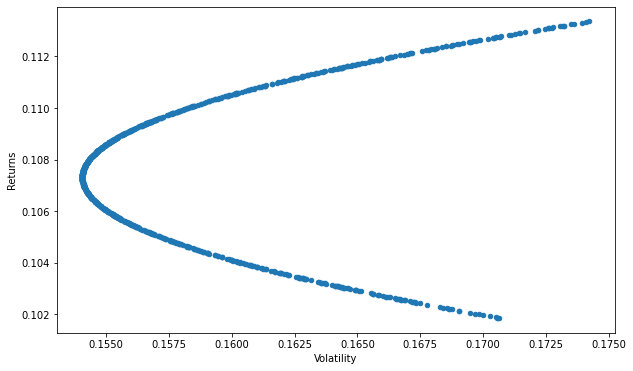

In [104]:
portfolios.plot(x='Volatility', y='Returns', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

TypeError: 'str' object is not callable

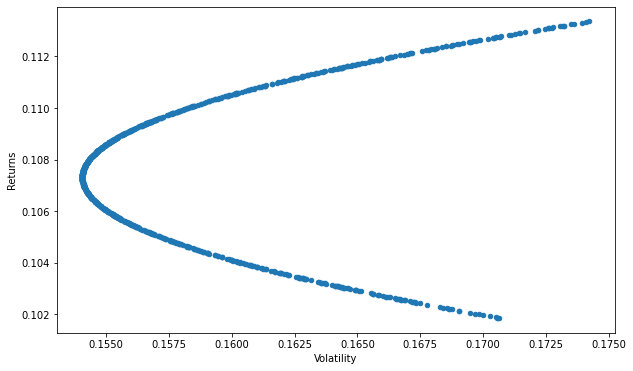

In [105]:
portfolios.plot(x='Volatility', y='Returns',kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returs')